In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Configure pandas to display all columns
pd.set_option("display.max_columns", None)

df_cluster = pd.read_csv('bank_marketing_dataset.csv')

numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cluster.select_dtypes(include=['object']).columns
duration_col = ['duration']  # Column to log transform

df_cluster = df_cluster.drop(columns=['nr.employed', 'emp.var.rate'])

numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns

X_preprocessed_df = df_cluster.copy()
X_preprocessed_df['duration'] = np.log1p(df_cluster['duration'])

scaler = StandardScaler()
X_preprocessed_df[numerical_cols_c] = scaler.fit_transform(X_preprocessed_df[numerical_cols_c])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_preprocessed_df[categorical_cols]),
                                   columns=encoder.get_feature_names_out(categorical_cols),
                                   index=X_preprocessed_df.index)

X_no_encoded = X_preprocessed_df.copy()

X_preprocessed_df.drop(columns=categorical_cols, inplace=True)

X_preprocessed_df = pd.concat([X_preprocessed_df, X_cat_encoded], axis=1)

print(X_preprocessed_df.shape)

X_preprocessed_df.head()

(41188, 63)


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,1.533034,0.431124,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.628993,-0.177114,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,0.274738,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.002309,-0.162669,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.533034,0.607534,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [2]:
prefixes = ['job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_of_week_', 'poutcome_', 'subscribed_']
one_hot_cols = [col for col in X_preprocessed_df.columns if any(col.startswith(prefix) for prefix in prefixes)]

In [3]:
continuous_data = X_preprocessed_df.drop(columns=one_hot_cols, axis=1)


c:\Users\valhk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\valhk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\valhk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\valhk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\valhk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embeddin

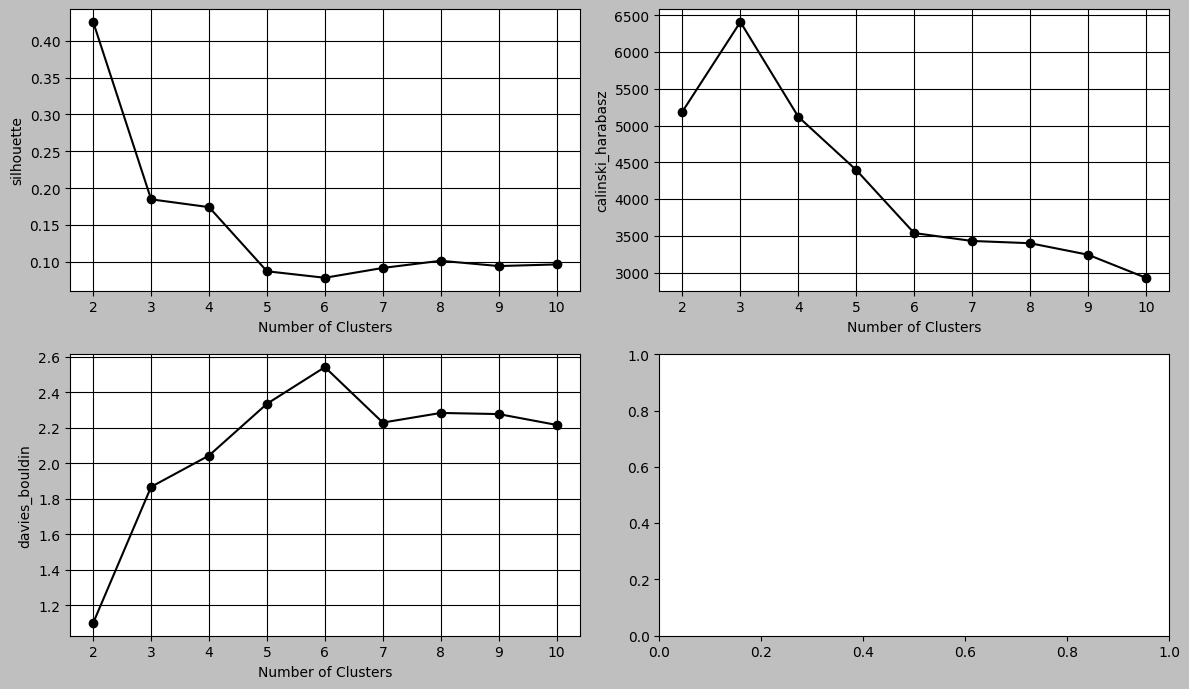

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Lists to store scores
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# Iterate over a range of cluster numbers from 2 to 10
for k in range(2, 11):
    # Spectral Clustering with the number of clusters 'k'
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
    cluster_labels = spectral.fit_predict(X_preprocessed_df)

    # Calculate silhouette score
    score = silhouette_score(X_preprocessed_df, cluster_labels)
    silhouette.append(score)

    # Calculate Calinski-Harabasz score
    score1 = calinski_harabasz_score(X_preprocessed_df, cluster_labels)
    calinski_harabasz.append(score1)

    # Calculate Davies-Bouldin score
    score2 = davies_bouldin_score(X_preprocessed_df, cluster_labels)
    davies_bouldin.append(score2)

# Plotting the metrics
plt.style.use('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items()) 

for i in range(2): 
    for j in range(2): 
        index = i * 2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[index] 
            axs[i, j].plot(range(2, 11), metric_values, marker='o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()


Let's try only continuous data to see if we get better scores

c:\Users\valhk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\valhk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\valhk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\valhk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\valhk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embeddin

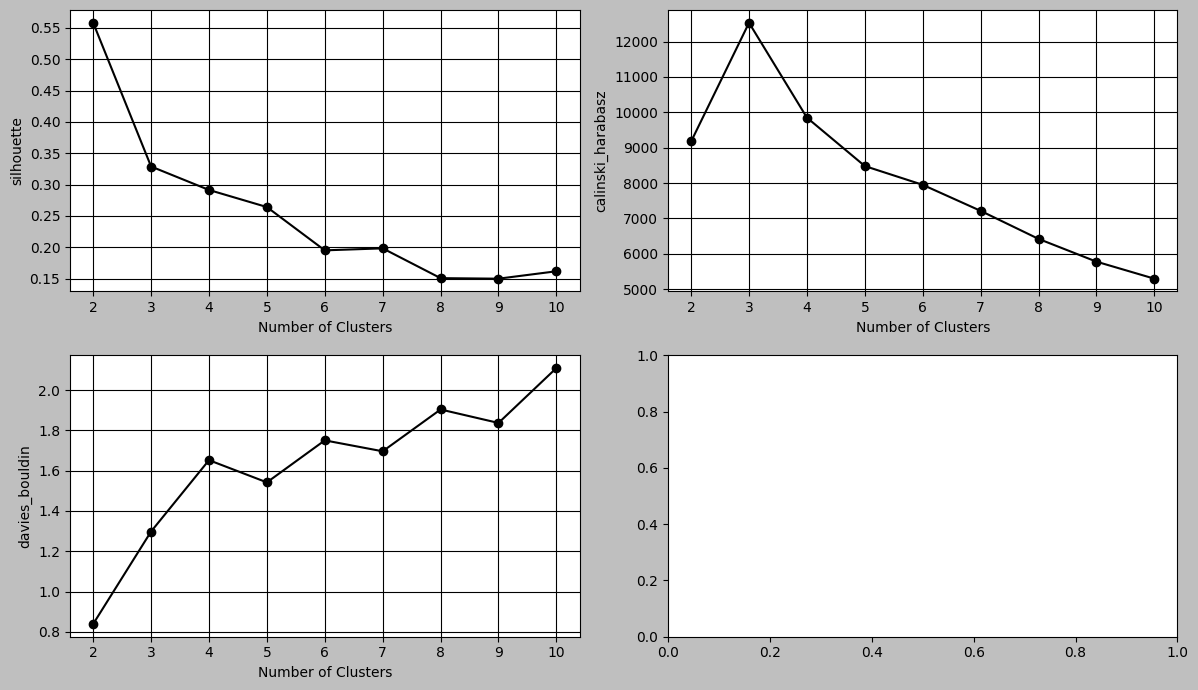

In [5]:
# Lists to store scores
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# Iterate over a range of cluster numbers from 2 to 10
for k in range(2, 11):
    # Spectral Clustering with the number of clusters 'k'
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
    cluster_labels = spectral.fit_predict(continuous_data)

    # Calculate silhouette score
    score = silhouette_score(continuous_data, cluster_labels)
    silhouette.append(score)

    # Calculate Calinski-Harabasz score
    score1 = calinski_harabasz_score(continuous_data, cluster_labels)
    calinski_harabasz.append(score1)

    # Calculate Davies-Bouldin score
    score2 = davies_bouldin_score(continuous_data, cluster_labels)
    davies_bouldin.append(score2)

# Plotting the metrics
plt.style.use('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items()) 

for i in range(2): 
    for j in range(2): 
        index = i * 2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[index] 
            axs[i, j].plot(range(2, 11), metric_values, marker='o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()


From the elbows we chose number of clusters = 4

In [7]:
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
cluster_labels = spectral.fit_predict(continuous_data)

    # Calculate silhouette score
silhouette_s = silhouette_score(continuous_data, cluster_labels)
print("Silhouette score: ", silhouette_s)

# Calculate Calinski-Harabasz score
ch_s = calinski_harabasz_score(continuous_data, cluster_labels)
print("Calinski-Harabasz score: ", ch_s)

# Calculate Davies-Bouldin score
db_s = davies_bouldin_score(continuous_data, cluster_labels)
print("Davies-Bouldin score: ", db_s)

c:\Users\valhk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette score:  0.29151878255330665
Calinski-Harabasz score:  9849.415995298781
Davies-Bouldin score:  1.6522362842798033


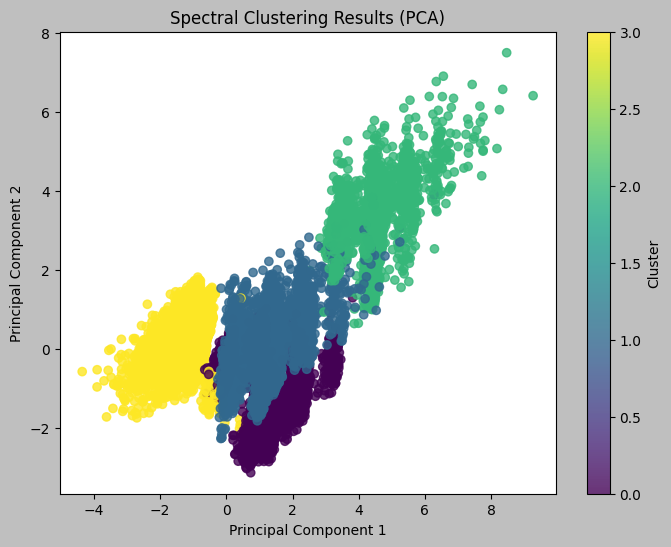

In [8]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(continuous_data)

# Plot clusters in the reduced 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.8)
plt.title('Spectral Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [10]:
df_cluster['cluster'] = cluster_labels

cluster_analysis = df_cluster.groupby('cluster').describe().T
# remove pandas display row limit
pd.set_option('display.max_rows', None)
cluster_analysis

cluster                          0            1            2             3
age            count  11908.000000  3597.000000  1515.000000  24168.000000
               mean      38.786194    42.639978    41.852805     40.130007
               std        9.548019    15.808405    15.296112      9.291577
               min       18.000000    17.000000    17.000000     19.000000
               25%       32.000000    30.000000    30.000000     33.000000
               50%       37.000000    37.000000    37.000000     39.000000
               75%       45.000000    54.000000    52.000000     47.000000
               max       95.000000    98.000000    98.000000     72.000000
duration       count  11908.000000  3597.000000  1515.000000  24168.000000
               mean     256.520490   272.648040   321.485809    253.054907
               std      258.138823   247.138608   254.676128    261.300334
               min        0.000000     1.000000     1.000000      0.000000
               25%       98.000000   121.000000   165.000000     99.000000
               50%      178.000000   205.000000   253.000000    172.000000
               75%      320.000000   343.000000   392.000000    309.000000
               max     4918.000000  3785.000000  3509.000000   4199.000000
campaign       count  11908.000000  3597.000000  1515.000000  24168.000000
               mean       2.127225     1.835974     1.822442      2.940169
               std        1.657046     1.282988     1.241414      3.321689
               min        1.000000     1.000000     1.000000      1.000000
               25%        1.000000     1.000000     1.000000      1.000000
               50%        2.000000     1.000000     1.000000      2.000000
               75%        3.000000     2.000000     2.000000      3.000000
               max       19.000000    12.000000    13.000000     56.000000
pdays          count  11908.000000  3597.000000  1515.000000  24168.000000
               mean     999.000000   999.000000     6.014521    999.000000
               std        0.000000     0.000000     3.824906      0.000000
               min      999.000000   999.000000     0.000000    999.000000
               25%      999.000000   999.000000     3.000000    999.000000
               50%      999.000000   999.000000     6.000000    999.000000
               75%      999.000000   999.000000     7.000000    999.000000
               max      999.000000   999.000000    27.000000    999.000000
previous       count  11908.000000  3597.000000  1515.000000  24168.000000
               mean       0.276117     0.366694     1.660726      0.000041
               std        0.473549     0.699064     0.934306      0.006432
               min        0.000000     0.000000     1.000000      0.000000
               25%        0.000000     0.000000     1.000000      0.000000
               50%        0.000000     0.000000     1.000000      0.000000
               75%        1.000000     1.000000     2.000000      0.000000
               max        3.000000     6.000000     7.000000      1.000000
cons.price.idx count  11908.000000  3597.000000  1515.000000  24168.000000
               mean      93.018892    93.093316    93.342507     93.936401
               std        0.136414     0.804508     0.783216      0.325882
               min       92.756000    92.201000    92.201000     92.756000
               25%       92.893000    92.431000    92.649000     93.918000
               50%       92.963000    92.963000    93.200000     93.994000
               75%       93.200000    94.027000    94.055000     93.994000
               max       93.798000    94.767000    94.767000     94.465000
cons.conf.idx  count  11908.000000  3597.000000  1515.000000  24168.000000
               mean     -45.185245   -35.389352   -38.341386    -39.091878
               std        2.219857     5.866299     6.628399      3.037420
               min      -50.000000   -50.800000   -50.800000    -50.000000
               25%      -